In [99]:
import math
import cmath
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

# Intro

This notebook will cover the mathmatical formulae that I've learned so far.  I'll also try to implement each formula in python.

In [100]:
class si :
    """
    This is a simple class that provides an easy way to access the engineering prefixes for the metric system.
    Example:
        25*si.k results in 25_000
    """
    Y = 10**24  # Yotta
    Z = 10**21  # Zetta
    E = 10**18  # Exa
    P = 10**15  # Peta
    T = 10**12  # Tera
    G = 10**9   # Giga
    M = 10**6   # Mega
    k = 10**3   # kilo

    m = 10**-3  # milli
    µ = 10**-6  # micro
    u = 10**-6  # micro ## so that we can type u instead of µ
    n = 10**-9  # nano
    p = 10**-12 # pico
    f = 10**-15 # femto
    a = 10**-18 # atto
    z = 10**-21 # zepto
    y = 10**-24 # yocto


These values can be made more legible by using Matplotlib's Engineering Formatter

In [101]:
from matplotlib.ticker import EngFormatter
engFormatter = EngFormatter()
engFormatter(si.u)

'1 µ'

I'll ocassionally want to plot things using some functions I defined elsewhere

In [102]:
import viz

from helpers import vect_to_num,num_to_vect

# Foundational Laws

## Ohm's Law

$$
V = IR
$$

## Watt's Law

$$
P = IV
$$

![Watt's Law Wheel.png](<attachment:Watt's Law Wheel.png>)
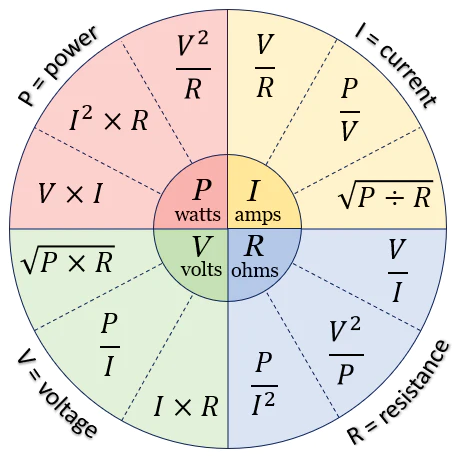

# Resistors (R)

## Summative Properties

In [103]:
# Setting up some values to play with
val_1 = 300
val_2 = 300
val_3 = 300

values = [val_1,val_2,val_3]

### Series Resistance
$$
R_t = \sum_{i=1}^{n}R_i
$$

This can be pretty easily handled by the builtin `sum` function, which takes an iterable as input.

In [104]:
sum(values)

900

### Parallel Resistance

$$
{R_{t}} = \left({\sum\limits_{i=1}^{n} \frac{1}{R_{i}}}\right)^{-1}
$$

In [105]:
def recipsumrecip(data):
    denom = 0
    for n in data:
        denom += 1/n
    return 1/denom

recipsumrecip(values)

100.0

# Inductors (L)

## Summative Properties

The total inductance of an inductor uses the same summative properties as a resistor.
##### In Series
Similar to [[Series Resistance Formula]]:
$$
L_t = \sum_{i=1}^{n}L_i
$$
##### In Parallel
Similar to [[Parallel Resistance Formula]]
$$
{L_{t}} = \left({\sum\limits_{i=1}^{n} \frac{1}{L_{i}}}\right)^{-1}
$$


## Inductive Reactance

Inductors resist change in current. How much they resist that current dependant of the rate of change in current, and is measured in Ohms (Ω).
$$
\varepsilon = -L\frac{di}{dt}
$$

Where:
 - $\varepsilon$ = Resistance to change
 - $L$ = Inductance
 - $\frac{di}{dt}$ = Rate of change of current over time


However, in sine-wave AC circuits, the rate of change can be substituted as $2\pi f$

$$
X_L = \varepsilon = 2\pi f L
$$

In [106]:
def get_inductive_reactance(inductance,frequency):
    """
    Returns a complex number representing the impedance vector of an inductive reactance.
    Variables:
      inductance: The inductance measured in Henries
      frequency: The frequency measured in Hertz
    """
    period = 2*math.pi
    omega = period*frequency
    Xl = omega*inductance
    return complex(0,Xl)

Xl =get_inductive_reactance(1*si.m,1*si.k)
print(Xl)

6.283185307179586j


### As a vector
Inductive reactance is conventionally said to be in the "positive j" direction, or 90°.

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

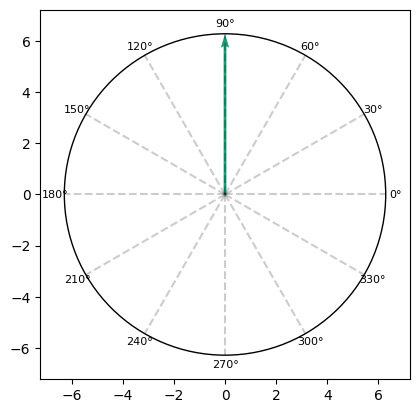

In [107]:
viz.plot_vector_diagram([num_to_vect(Xl)])

# Capacitors (C)

## Summative Properties


#### In series
Similar to [[Parallel Resistance Formula]]
$$
{C_{t}} = \left({\sum\limits_{i=1}^{n} \frac{1}{C_{i}}}\right)^{-1}
$$
#### In parallel
Similar to [[Series Resistance Formula]]
$$
C_t = \sum_{i=1}^{n}C_i
$$



## Capactive Reactance

Similar to inductors, capacitors also exhibit a reactance. However, they become less reactive at higher frequencies.
$$
X_C = \varepsilon = \frac{1}{C 2\pi f}
$$


In [108]:
def get_capacitive_reactance(capacitance,frequency):
    """
    Returns a complex number representing the impedance vector of an capacitive reactance.
    Variables:
      capacitance: The capacitance measured in Farads
      frequency: The frequency measured in Hertz
    """
    period = 2*math.pi
    omega = period*frequency
    Xc = 1/(omega*capacitance)
    return complex(0,-Xc)

Xc = get_capacitive_reactance(1*si.u,1*si.k)
print(Xc)

-159.15494309189535j


### As a vector
Capacitive reactance is conventionally said to be in the "negative j" direction, or -90°.

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

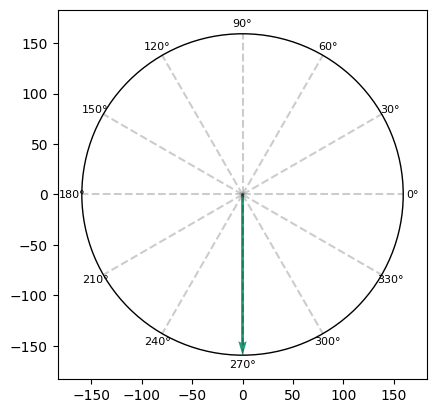

In [109]:
viz.plot_vector_diagram([num_to_vect(Xc)])

# Inductive and Capacitive Resonance

## Calculating resonant frequency
Inductive and capacitive reactance are both functions of *frequency*. Because of the shape of their reactance curves, there is a frequency where their reactances will be equal.

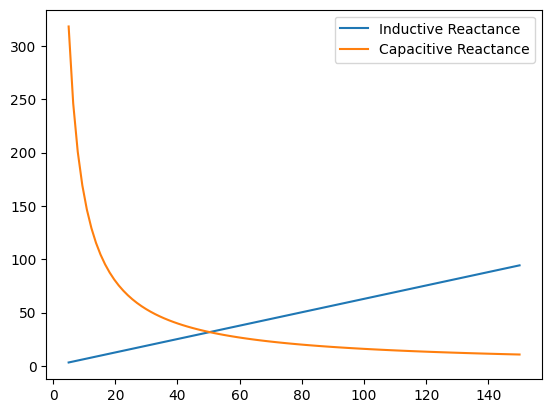

In [110]:
L = 100*si.m # 100 milliHenry inductor
C = 100*si.µ # 100 microFarad capacitor
#Generate a list of 100 frequencies.
freqs = np.linspace(5,150,100)
# Calculate the reactance for each frequency. 
ind_reactances = [abs(get_inductive_reactance(L,freq)) for freq in freqs]
cap_reactances = [abs(get_capacitive_reactance(C,freq)) for freq in freqs]

# Plot them
fig, ax = plt.subplots()
ax.plot(freqs,ind_reactances,label='Inductive Reactance')
ax.plot(freqs,cap_reactances,label='Capacitive Reactance')
ax.legend()
plt.show()

When this occurrs, the two components are at **resonant frequency**.  To find this frequency, we simply set the two reactance formulas equal to one another:
$$
L 2\pi f = \frac{1}{C 2\pi f}
$$

Solving for $f$ yields:
$$
 f = \frac{1}{2\pi \sqrt{LC}}
$$

In [111]:
def get_resonant_frequency(inductance,capacitance):
    period = 2*math.pi
    f = 1/(period*math.sqrt(inductance*capacitance))
    return f

resonant_frequency = get_resonant_frequency(C,L)
print(resonant_frequency)

50.329212104487034


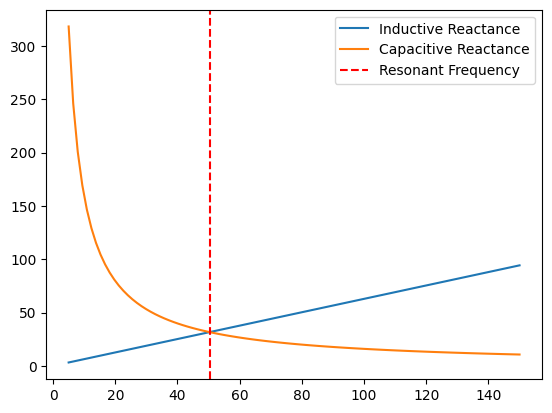

In [112]:
fig, ax = plt.subplots()
ax.plot(freqs,ind_reactances,label='Inductive Reactance')
ax.plot(freqs,cap_reactances,label='Capacitive Reactance')
ax.axvline([resonant_frequency], label='Resonant Frequency', linestyle='--', color = 'red')
ax.legend()
plt.show()

### Precise Resonant Frequency

For most practical applications, the formula above is close enough. However, sometimes it's necessary to account for the winding resistance of the inductor:

$$
 f_r = \frac{\sqrt{1-R^2_W C/L}}{2\pi \sqrt{LC}}
$$

In [113]:
def get_exact_resonant_frequency(Rwinding,inductance,capacitance):
    # Denominator is the same as the inexact formula
    res_freq = get_resonant_frequency(inductance,capacitance)
    # A fancy numerater accounts for winding resistance
    numerator = math.sqrt(1-Rwinding**2*(capacitance/inductance))
    exact_freq = numerator*res_freq
    return exact_freq

# Passive Filters

In [114]:
import schemdraw
import schemdraw.elements as elm

## Critical Frequency
The critical frequency is the frequency at which the output voltage decreases by 3 dB.

I'm not sure I understand just yet, but the book is saying:

$$
dB = 10 \log(\frac{P_{out}}{P_{in}})
$$
$$
dB = 20 \log(\frac{V_{out}}{V_{in}})
$$

The reason why one is 10x and the other is 20x has to do with the properties of logarithms and one of the formulas for power:
$$
P = V^2 R^{-1}
$$

## RC Low Pass Filter

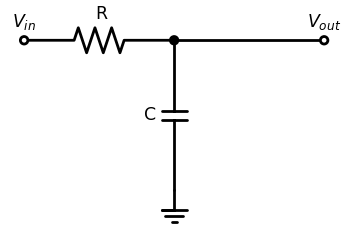

In [115]:
# Draw a RC low-pass filter with SchemDraw

with schemdraw.Drawing() as d:
    elm.Dot(label='$V_{in}$',open=True)
    R1 = elm.Resistor().dot().label('R')
    elm.Capacitor().down().label('C')
    elm.Ground()
    elm.Line().right().at(R1.end)
    elm.Dot(open=True).label('$V_{out}$')

In this scenario there is a frequency at which the capacitive reactance will be quivalent to the resistance.  This will be the *critical frequency* $f_c$ of the filter.

$$
\begin{align}
X_C &= \frac{1}{2 \pi f_c C} = R \\
\\
f_c &= \frac{1}{2 \pi R C}

\end{align}
$$


In [116]:
def get_rc_critical_frequency(resistance,capacitance):
    return 1/(2*math.pi*resistance*capacitance)

R = 100 #Ohms

critical_frequency = get_rc_critical_frequency(R,C)
print(critical_frequency)

15.915494309189537


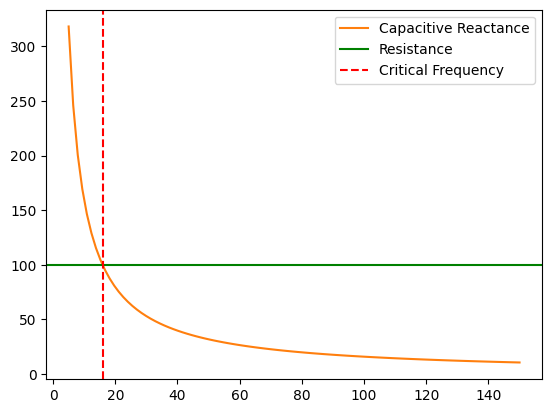

In [117]:
# Plotting R and Xc interactions

fig, ax = plt.subplots()
# ax.plot(freqs,ind_reactances,label='Inductive Reactance')
ax.plot(freqs,cap_reactances,label='Capacitive Reactance', color='C1')
ax.axhline([R], label='Resistance', linestyle='-', color = 'green')
ax.axvline([critical_frequency], label='Critical Frequency', linestyle='--', color = 'red')
ax.legend()
plt.show()

According to earlier, the critical frequency is the frequency at which the output voltage drops by 3 dB.

We can calculate the voltage drop each component by using the voltage divider rule:

$$
V_{out} = V_{in} \times \left(\frac{|Z_i|}{|Z_{total}|}\right)
$$

In [175]:
# Voltage divider calculations
resistor_voltages = []
capacitor_voltages = []
V_in = 10 #Volts
freqs = range(1,100)
for freq in freqs:
    Xc = get_capacitive_reactance(C,freq)
    Z = R+Xc
    V_R = V_in*(abs(R)/abs(Z))
    V_C = V_in*(abs(Xc)/abs(Z))
    resistor_voltages.append(V_R)
    capacitor_voltages.append(V_C)

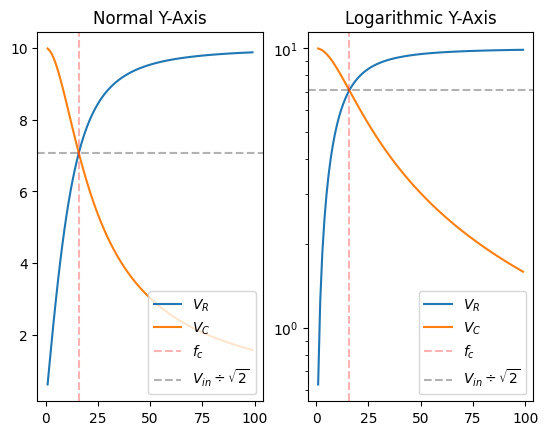

In [176]:
# Plotting them
fig, axs = plt.subplots(1,2)
for ax in axs:
    ax.plot(freqs,resistor_voltages, label='$V_R$')
    ax.plot(freqs,capacitor_voltages, label='$V_C$')
    ax.axvline([critical_frequency], label='$f_c$', linestyle='--', color = 'red',alpha=0.3)
    ax.axhline(V_in/math.sqrt(2), label=r'${V_{in}}\div{\sqrt{2}}$', linestyle='--',color='black',alpha=0.3)
    # ax.axhline(V_in*.7, label=r'${V_{in}}\div{\sqrt{2}}$', linestyle='--',color='black',alpha=0.3)
    ax.legend(loc='lower right')

axs[0].set_title('Normal Y-Axis')
axs[1].set_title('Logarithmic Y-Axis')
axs[1].set_yscale('log')

This is an interesting interaction. Even though $R$ and $X_C$ are equivalent to each other, because of the phase difference, the voltage divide does not happen at $\frac{1}{2}$, but rather at $\frac{1}{\sqrt2}$.

Notice how on the logarithmic scale, that intersection is $\approx$ 3 notches down? That should clue us in on what is meant when they say that the output voltage decreases 3 *decibels* at the critical frequency.  Technically, that notch is 70% of 10, so my guess is that we use the 3 dB rule because 0.7 is "close'nuff" to 0.707.

(I intentionally chose 10 V as the input voltage in hopes of seeing this.)

## RL Low-pass filter

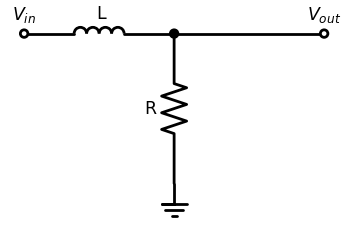

In [178]:
# Draw a RL low-pass filter with SchemDraw

with schemdraw.Drawing() as d:
    elm.Dot(label='$V_{in}$',open=True)
    R1 = elm.Inductor().dot().label('L')
    elm.Resistor().down().label('R')
    elm.Ground()
    elm.Line().right().at(R1.end)
    elm.Dot(open=True).label('$V_{out}$')

In this scenario the output voltage is taken across the resistor.

Again, the critical frequency occurs when the resistance and inductive reactance are equal in magnitude.
$$
X_L = 2 \pi f_c L = R
$$

Solving for $f_c$:
$$
\begin{align}
f_c &= \frac{R}{2 \pi L}\\
\\
f_c &= \frac{1}{2 \pi (L/R)}
\end{align}
$$